# CSCA 5632 Final Project - Unsupervised and Supervised Learning on Animal Faces (AFHQ Dataset)
### By Moshiur Howlader
##### Github Link : https://github.com/Mosh333/csca5632-final-project

### 1. Introduction

In today’s data-driven world, the ability to **uncover structure and meaning from unlabeled data** represents one of the most powerful and important areas in machine learning.
While supervised learning depends on extensive labeled datasets, many real-world domains contain **vast quantities of raw, unannotated information**—such as images, text, medical scans, or sensor data—where manual labeling is costly or infeasible.  
Here, [**unsupervised learning**](https://biztechmagazine.com/article/2025/05/what-are-benefits-unsupervised-machine-learning-and-clustering-perfcon) plays a pivotal role: it enables algorithms to reveal hidden patterns, latent representations, and natural groupings within data without external supervision.

Unsupervised learning drives [innovation across diverse domains](https://pmc.ncbi.nlm.nih.gov/articles/PMC7983091/):

- [**Data exploration and pattern discovery:**](https://analyticalsciencejournals.onlinelibrary.wiley.com/doi/pdfdirect/10.1002/mas.21602) Enables open-ended analysis of large, high-dimensional datasets to uncover hidden structures, correlations, and trends—reducing dimensionality and aiding human interpretation, such as exploring mass spectrometry data across large experimental datasets.  
- [**Computer vision:**](https://viso.ai/deep-learning/supervised-vs-unsupervised-learning/) Groups unlabeled images by similarity, compresses data via [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), or learns visual embeddings through self-supervised methods like [SimCLR](https://arxiv.org/abs/2002.05709).  
- [**Natural language processing:**](https://milvus.io/ai-quick-reference/what-is-the-role-of-unsupervised-learning-in-nlp) Learns semantic relationships in text through [Word2Vec](https://arxiv.org/abs/1301.3781) or discovers latent topics using [Latent Dirichlet Allocation (LDA)](https://jmlr.org/papers/v3/blei03a.html).  
- [**Healthcare and biomedical research:**](https://pubmed.ncbi.nlm.nih.gov/31891765/) Facilitates the discovery of hidden disease patterns, comorbidity clusters, and patient subgroups from large-scale electronic health records—enabling better understanding of latent traits, risk domains, and disease progression, such as identifying novel comorbidity patterns in aging cohorts.  
- [**Autonomous systems and robotics:**](https://fiveable.me/introduction-autonomous-robots/unit-7/unsupervised-learning/study-guide/rNorV1tsC0TeCPOO) Maps environments, groups sensor inputs, and learns spatial representations without labeled supervision.  
- [**Recommender and personalization systems:**](https://www.mdpi.com/2073-8994/12/2/185) Clusters users or content to generate recommendations when explicit ratings are unavailable.

Together, these examples highlight how unsupervised learning forms the foundation of **exploratory data analysis** and **representation learning**, allowing models to extract structure from raw data before labels exist.

![Illustration of Unsupervised Learning Process - https://uk.mathworks.com/discovery/unsupervised-learning.html](../images/1-intro-pic.png)

*Figure: Conceptual illustration of unsupervised learning — an algorithm groups unlabeled data points (shapes) based on similarity, forming meaningful clusters.*

---

#### 1.1 Project Overview and Objectives
Here we discuss the selected data source and the unsupervised learning problem we aim to solve.

#### 1.2 Gather Data, Determine the Method of Data Collection and Provenance
This project uses the **[Animal Faces-HQ (AFHQ) dataset](https://www.kaggle.com/datasets/andrewmvd/animal-faces)** — a publicly available image dataset originally curated by **Andrew Mvd** on Kaggle under a **CC BY-NC license**.  
AFHQ contains **over 16,000 high-quality animal face images** across three balanced categories: **cats, dogs, and wildlife**.


According to the Kaggle description:
> “This dataset, also known as Animal Faces-HQ (AFHQ), consists of 16,130 high-quality images at 512×512 resolution.  
> There are three domains of classes, each providing about 5000 images.  
> By having multiple (three) domains and diverse images of various breeds per each domain, AFHQ sets a challenging image-to-image translation problem.  
> The classes are: Cat, Dog, and Wildlife.”

For this project, images are **resized to XxY pixels**, normalized to a [0, 1] range, and converted to **RGB tensors** (three-channel numerical arrays representing red, green, and blue intensities).  
These preprocessing steps prepare the data for feature extraction, dimensionality reduction, and clustering.  
The dataset’s high resolution, balance across categories, and visual diversity make it well-suited for evaluating **unsupervised image representation learning** and **clustering performance**.

![Sample Image Data found in this dataset](../images/2-intro-pic.png)   
*Figure: Preview of the dataset used to perform this project.*

---

#### 1.3 Identify an Unsupervised Learning Problem
The goal of this project is to test whether **unsupervised learning algorithms** can **group animal face images into their correct categories** — cats, dogs, and wildlife — **based only on visual similarity**, without using any labels.  
In other words, can the models automatically recognize and cluster similar-looking animals together?

The analysis includes **exploratory data analysis (EDA)**, visualization of image features using **[t-SNE](https://lvdmaaten.github.io/tsne/)** and **[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)**, and the application of clustering algorithms such as **[K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)**, **[DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)**, and **[Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)**.  

Clustering performance is evaluated using the **[Silhouette Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)**, **[Adjusted Rand Index (ARI)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)**, and **[Normalized Mutual Information (NMI)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html)**.  

By comparing the results of multiple unsupervised models — and contrasting them with a small supervised baseline classifier — this project shows both the **strengths and limitations** of unsupervised learning for basic image classification tasks.  
The findings demonstrate how clustering can uncover **hidden visual structure** in data and serve as a foundation for more advanced **self-supervised** or **semi-supervised** learning approaches.

### 2. Dataset Overview and Preprocessing

#### 2.1 Fetching the Dataset

To begin, one must download the dataset (Github does not allow large data to be stored in repo):

Git Bash / Linux / WSL:
```bash
curl -L -o "$(pwd)/data/animal-faces.zip" https://www.kaggle.com/api/v1/datasets/download/andrewmvd/animal-faces

```

After downloading, extract the dataset:
```bash
unzip "$(pwd)/data/animal-faces.zip" -d "$(pwd)/data/animal-faces"
```

To confirm successful extraction, verify that the dataset contains 16,130 images:
```bash
find "$(pwd)/data/animal-faces" -type f | wc -l
```

**Expected output**:
```bash
16130
```

Alternatively, one can simply download the image zip folder from https://www.kaggle.com/datasets/andrewmvd/animal-faces and store it under `~/data` and extract from there as `~/data/animal-faces`
With the dataset successfully extracted and verified, the next step involves exploring its structure and visual characteristics through exploratory data analysis (EDA).

### 3. Exploratory Data Analysis (EDA)

#### 3.1 Initial Inspection

This section inspects and visualizes the **Animal Faces-HQ (AFHQ)** dataset to understand its structure, quality, and key characteristics before model building.  
The analysis focuses on data composition, visual patterns, feature correlations, preprocessing, and the main insights that will guide the subsequent unsupervised learning experiments.

Before applying clustering or dimensionality reduction, it is essential to perform an initial visual inspection of the dataset to gain intuition about its organization and diversity.

The dataset is organized into three main categories — **cats**, **dogs**, and **wildlife** — each containing roughly 5,000 high-quality 512×512 images.  
Each category includes both training and validation subsets, stored under the following structure:


```bash
data/
├── animal-faces/                # Extracted dataset
│   ├── afhq/
│       ├── train/
│       │   ├── cat/             # ~5,153 images
│       │   ├── dog/             # ~4,739 images
│       │   └── wild/            # ~4,738 images
│       │ 
│       └── val/
│            ├── cat/            # 500 images
│            ├── dog/            # 500 images
│            └── wild/           # 500 images
│
└── animal-faces.zip             # Original downloaded dataset archive

```

#### 3.2 Visual Inspection
A few random samples from each class are shown below to demonstrate image quality and diversity.

Observations:
- The images are **balanced** across categories (≈5,000 per class).  
- Each image is **centered and cropped** to focus on the animal’s face.  
- There is noticeable variation in lighting, background, and species within each class, which is beneficial for clustering and unsupervised generalization, as the algorithms are exposed to a richer set of visual features to learn from.

![Exploring Cat Pic](../images/3-pic.png)   
![Exploring Dog Pic](../images/4-pic.png)   
![Exploring Wild Pic](../images/5-pic.png)   
![Exploring Cat Pic](../images/6-pic.png)   
![Exploring Dog Pic](../images/7-pic.png)   
![Exploring Wild Pic](../images/8-pic.png)

#### 3.3 Dataset Composition and Descriptive Summary

Since this is the first project in this course involving image data, it is important to understand how the dataset is represented numerically before performing analysis.

Each image in the **AFHQ dataset** is a color image with a resolution of **512 × 512 pixels**, stored in the **RGB (Red, Green, Blue)** color model.  
This means that every image is essentially a 3-dimensional array (or tensor) of shape **(512, 512, 3)**, where:

- The first two dimensions correspond to the image’s **height** and **width** in pixels.  
- The third dimension has **three channels** — one each for **red**, **green**, and **blue** color intensities.  
- Each pixel location contains an RGB triplet, e.g. `[125, 64, 210]`, representing the color at that point (with intensity values typically ranging from 0–255).

In total, each image contains:
- 512 × 512 = **262,144 pixels**
- Each pixel has 3 values → **786,432 total intensity values per image**

These raw pixel intensities form the foundation for the statistical analysis, color distribution plots, and feature extraction steps that follow in this section.

For the EDA section, the NumPy and Panda library will be primarily used to explore insights into the data. For the model building sections, scikit-learn will be leveraged.

See the following for more details:
- https://medium.com/%40md-jewel/understanding-digital-images-for-image-processing-and-computer-vision-part-1-cc42be78cca1
- https://en.wikipedia.org/wiki/RGB_color_model
- https://computationalthinking.mit.edu/Fall22/images_abstractions/images/
- https://dev.to/adityabhuyan/understanding-image-data-representation-in-computer-systems-4kdm
- https://en.wikipedia.org/wiki/Digital_image_processing

google "eda on image dataset"
https://datascience.stackexchange.com/questions/29223/exploratory-data-analysis-with-image-datset
https://medium.com/@cgawande12/a-comprehensive-eda-and-image-classification-with-the-pok%C3%A9mon-image-dataset-82a370486445



In [1]:
!pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# Get absolute path to the project root
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))  # go one level up from /notebooks
DATA_DIR = os.path.join(BASE_DIR, "data", "animal-faces", "afhq", "train")

print("Base directory:", BASE_DIR)
print("Data directory:", DATA_DIR)

# Get all class names (cat, dog, wild)
classes = os.listdir(DATA_DIR)
print("Classes:", classes)

# Lists for data and labels
data = []
labels = []
records = []  # For summary DataFrame

# Modern OS automatically cache recently read files in RAM for faster speed up on re-runs
# Resize image to be smaller on systems with less than 32GB RAM (mine is 64GB DDR5)
for cls in classes:
    folder = os.path.join(DATA_DIR, cls)
    for fname in tqdm(os.listdir(folder), desc=f"Loading {cls}"):
        fpath = os.path.join(folder, fname)
        img = cv2.imread(fpath)
        if img is None:
            print(f"⚠️ Skipping corrupted file: {fname}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # img = cv2.resize(img, (128, 128))   # optional resize for speed, only uncomment if system is less than 32GB RAM

        # Append image and label for modeling
        data.append(img)
        labels.append(cls)

        # Record summary stats for DataFrame
        records.append({
            'File': fname,
            'Class': cls,
            'Height': img.shape[0],
            'Width': img.shape[1],
            'Mean_R': np.mean(img[:, :, 0]),
            'Mean_G': np.mean(img[:, :, 1]),
            'Mean_B': np.mean(img[:, :, 2])
        })

# Convert to numpy arrays for ML
data = np.array(data)
labels = np.array(labels)

# Create summary DataFrame
df_summary = pd.DataFrame(records)

print("✅ Data shape:", data.shape)
print("✅ Labels shape:", labels.shape)
print("✅ Summary DataFrame shape:", df_summary.shape)

# Display the first few rows of summary
display(df_summary.head())

Base directory: d:\Documents\GitHub\csca5632-final-project
Data directory: d:\Documents\GitHub\csca5632-final-project\data\animal-faces\afhq\train
Classes: ['cat', 'dog', 'wild']


Loading wild: 100%|██████████| 4738/4738 [00:07<00:00, 622.50it/s]


✅ Data shape: (14630, 512, 512, 3)
✅ Labels shape: (14630,)
✅ Summary DataFrame shape: (14630, 7)


,File,Class,Height,Width,Mean_R,Mean_G,Mean_B
0,flickr_cat_000002.jpg,cat,512,512,39.049721,37.773727,32.619888
1,flickr_cat_000003.jpg,cat,512,512,116.653389,105.813721,91.708538
2,flickr_cat_000004.jpg,cat,512,512,110.633583,104.424599,97.659111
3,flickr_cat_000005.jpg,cat,512,512,93.215023,96.443832,103.763954
4,flickr_cat_000006.jpg,cat,512,512,93.932934,100.388748,108.864693


Class distribution

C:\Users\howla\AppData\Local\Temp\ipykernel_11316\1861085957.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="Set2")


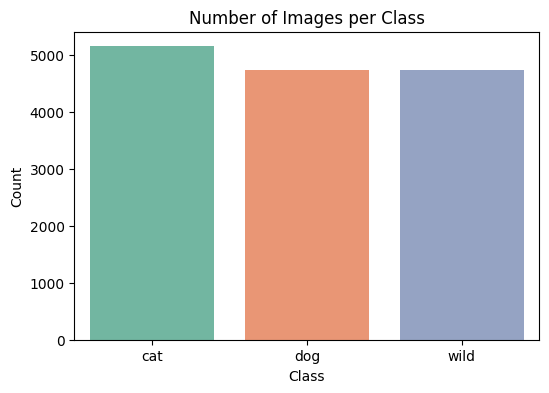

cat     5153
dog     4739
wild    4738
Name: count, dtype: int64


In [3]:
import pandas as pd
import seaborn as sns

class_counts = pd.Series(labels).value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Set2")
plt.title("Number of Images per Class")
plt.xlabel("Class"); plt.ylabel("Count")
plt.show()

print(class_counts)


Compute image dimensions (just to confirm)

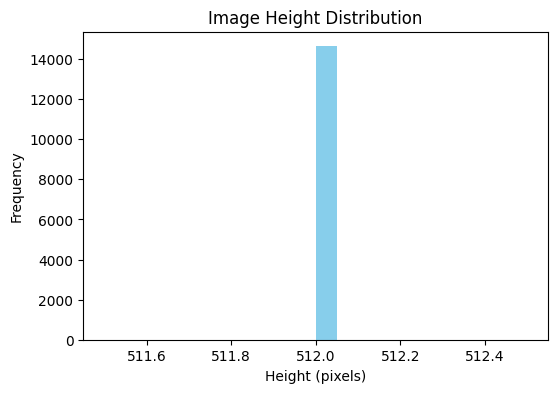

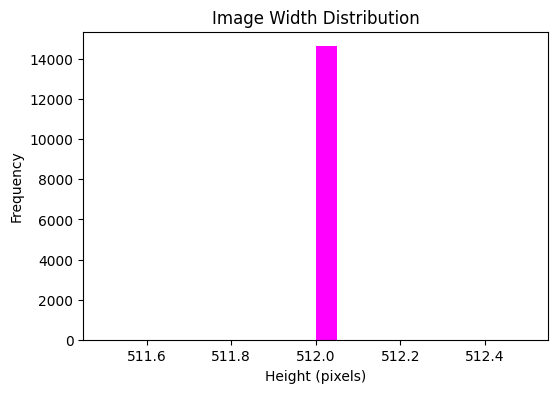

In [4]:
heights, widths = zip(*[img.shape[:2] for img in data])
plt.figure(figsize=(6,4))
plt.hist(heights, bins=20, color='skyblue')
plt.title("Image Height Distribution")
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(widths, bins=20, color='magenta')
plt.title("Image Width Distribution")
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")
plt.show()

Compute average RGB channel intensities per class

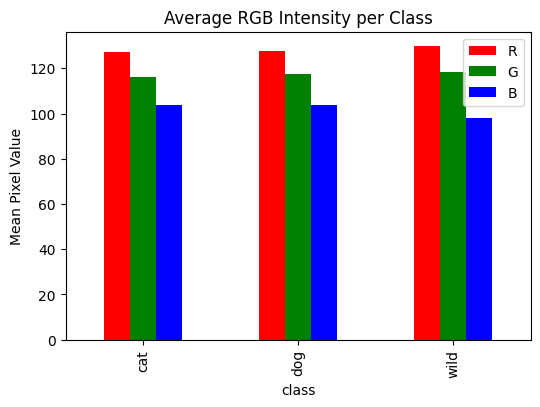

In [5]:
means = {'class': [], 'R': [], 'G': [], 'B': []}

for cls in np.unique(labels):
    imgs = np.array([data[i] for i in range(len(data)) if labels[i] == cls])
    mean_rgb = imgs.mean(axis=(0,1,2))
    means['class'].append(cls)
    means['R'].append(mean_rgb[0])
    means['G'].append(mean_rgb[1])
    means['B'].append(mean_rgb[2])

df_means = pd.DataFrame(means)
df_means.set_index('class').plot(kind='bar', figsize=(6,4), color=['r','g','b'])
plt.title("Average RGB Intensity per Class")
plt.ylabel("Mean Pixel Value")
plt.show()


Brightness / grayscale distribution

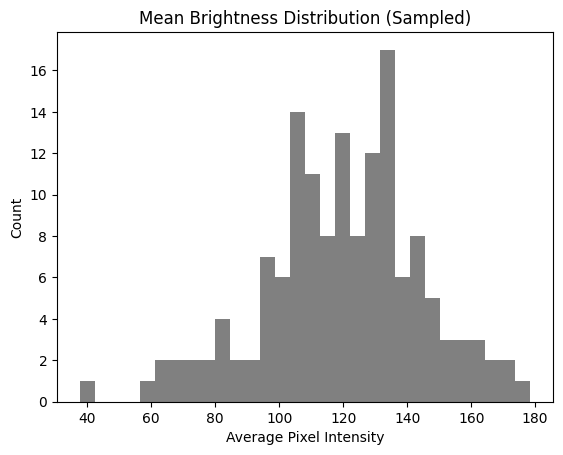

In [6]:
import cv2

gray_means = []
for img in data[::100]:  # sample every 100th image
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_means.append(gray.mean())

plt.hist(gray_means, bins=30, color='gray')
plt.title("Mean Brightness Distribution (Sampled)")
plt.xlabel("Average Pixel Intensity")
plt.ylabel("Count")
plt.show()


#### 3.4 Feature Correlations and Visual Patterns

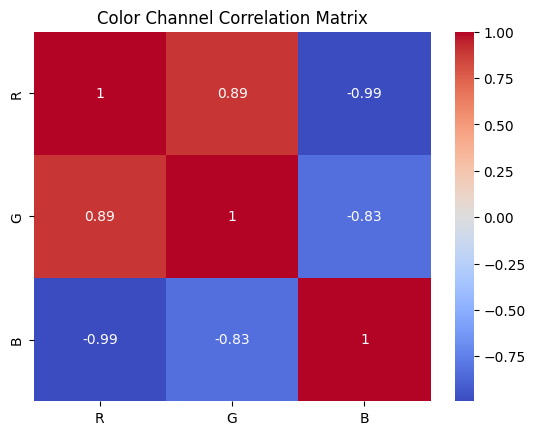

In [7]:
corr = df_means[['R','G','B']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Color Channel Correlation Matrix")
plt.show()


#### 3.5 Data Quality and Cleaning


In [8]:
import os

total = len(labels)
valid = sum([img is not None for img in data])
print(f"Valid images: {valid}/{total}")


Valid images: 14630/14630


#### 3.6 Transformations and Normalization



#### 3.7 Feature Importance and Hypothesis

It is expected that clustering will be influenced more by texture and shape (e.g., fur pattern, facial features) than by color alone, as background and lighting conditions vary widely within each category.


#### 3.8 Summary of EDA Findings

The dataset is clean, balanced, and visually diverse.
Color distributions overlap across classes, but texture and shape differences are evident.
No missing or corrupted data were found, and normalization has been applied.
The dataset is ready for feature extraction and unsupervised modeling.

### 4. Unsupervised Learning Models and Analysis

### 5. Supervised Baseline (Comparative Analysis)

### 6. Discussion and Conclusions

### 7. Future Improvements and Areas to Explore

### 8. Summary of Results

### 9. References and Acknowledgments

1. **Animal Faces-HQ (AFHQ) Dataset (Kaggle):**  
   https://www.kaggle.com/datasets/andrewmvd/animal-faces

2. **Unsupervised Learning Overview:**  
   https://biztechmagazine.com/article/2025/05/what-are-benefits-unsupervised-machine-learning-and-clustering-perfcon

3. **Applications in Diverse Domains:**  
   https://pmc.ncbi.nlm.nih.gov/articles/PMC7983091/

4. **Data Exploration and Pattern Discovery:**  
   https://analyticalsciencejournals.onlinelibrary.wiley.com/doi/pdfdirect/10.1002/mas.21602

5. **Computer Vision Overview:**  
   https://viso.ai/deep-learning/supervised-vs-unsupervised-learning/

6. **Principal Component Analysis (PCA):**  
   https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

7. **SimCLR Paper (Self-Supervised Learning):**  
   https://arxiv.org/abs/2002.05709

8. **Unsupervised Learning in NLP:**  
   https://milvus.io/ai-quick-reference/what-is-the-role-of-unsupervised-learning-in-nlp

9. **Word2Vec Paper:**  
   https://arxiv.org/abs/1301.3781

10. **Latent Dirichlet Allocation (LDA) Paper:**  
    https://jmlr.org/papers/v3/blei03a.html

11. **Healthcare and Biomedical Applications:**  
    https://pubmed.ncbi.nlm.nih.gov/31891765/

12. **Autonomous Systems and Robotics:**  
    https://fiveable.me/introduction-autonomous-robots/unit-7/unsupervised-learning/study-guide/rNorV1tsC0TeCPOO

13. **Recommender and Personalization Systems:**  
    https://www.mdpi.com/2073-8994/12/2/185

14. **t-SNE Algorithm:**  
    https://lvdmaaten.github.io/tsne/

15. **PCA (Scikit-learn Implementation):**  
    https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

16. **K-Means Clustering:**  
    https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

17. **DBSCAN Clustering:**  
    https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

18. **Agglomerative Clustering:**  
    https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

19. **Silhouette Score:**  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

20. **Adjusted Rand Index (ARI):**  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

21. **Normalized Mutual Information (NMI):**  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html